#    Handling real-world case with A/B testing

## GOAL: VP of product has set up the goal to increase entire store's revenue by 5% in 2019.

### How are we going to approach this problem with A/B testing in mind?
#### Here are the steps we need to follow.

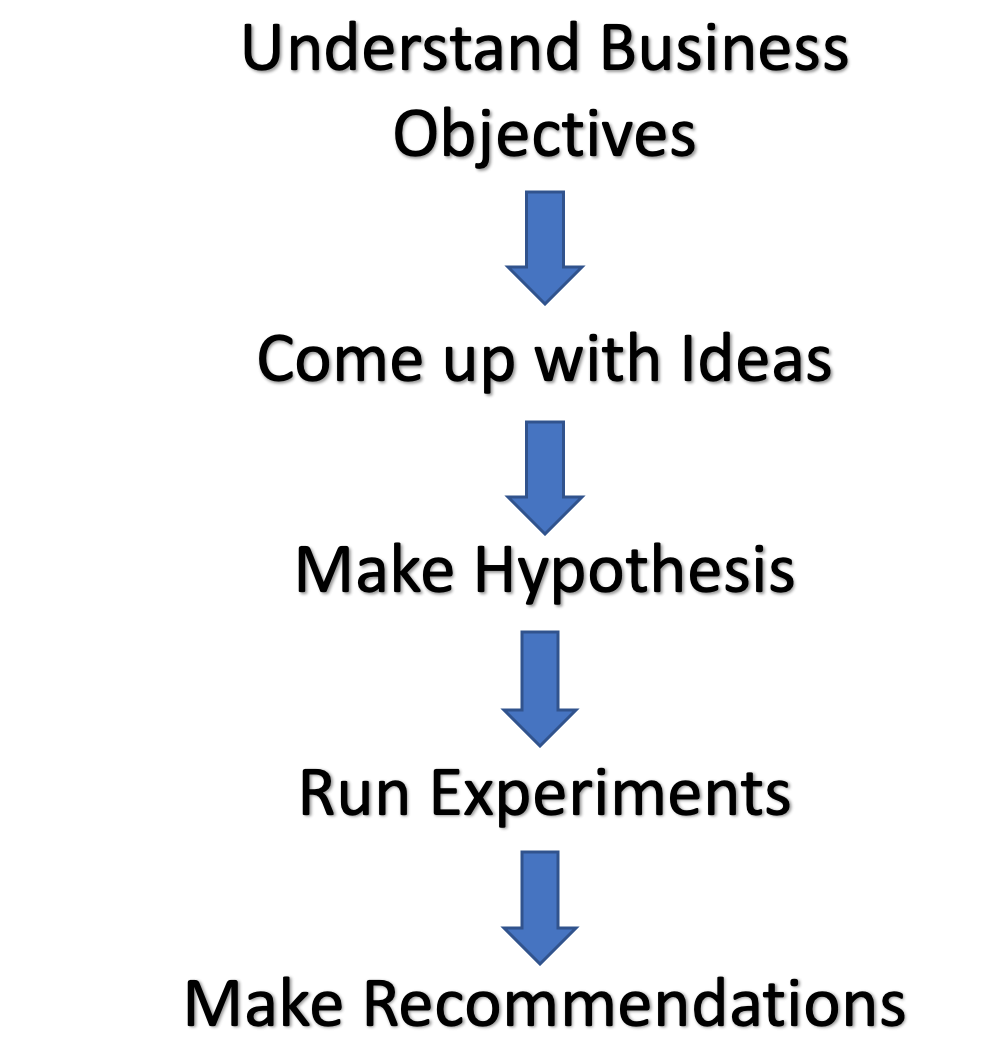

In [1]:
from IPython.display import Image
Image(filename='framework.png',width=300)

- **Understand Business Objectives**: <br>1. Increase store revenue by 5%  <br>    2. need to figure out stuff we can do to achieve this goal

- **Come up with Ideas**: <br>1. EDA(Exploratory Data Analysis)                                                                                 <br>2. Find correlations to see if certain product features/user behavior is underperforming

- **Make hypothesis**: <br>1. Make hypothesis based on your EDA                                                                              <br>2. Assume causality. If we can increase X, we can increase Y.

- **Run Experiments**: <br>1. Design A/B test                                                                                

- **Make Recommendations**: <br>1. Decide if we should do it based on result from A/B test

## **Understand Business Objective**

#### Since I've known my business objective is to increase store revenue by 5%, I need to consider what we need to achieve this goal. There are some thoughts out of my mind.  <br>
- perform competitor analysis.
- Lessons you learned from related previous experience and link it to this particular case.
- Know more about the user bebehavior and preference provided by third party
- Conduct  behavior research, e.g. blogs/books/papers
- <font color=blue>Most importantly, deep dive analysis in current data

## **Come up with Ideas**

### Data set exploration

In [2]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
import seaborn as sns

In [3]:
my_data = pd.read_csv('Python_project_eda.csv')

In [4]:
# View data head
my_data.head(5)

,buyer_week_before,clicked_buy_before,country,existing_buyer,initial_fop_set,made_purchase_before,saw_cart_before,spend_usd_next_14_days,user_added_credit_card,user_added_dcb,user_added_fop,user_added_gift_card,user_added_paypal,user_id,visit_before
0,0,0.0,IN,0,False,0.0,1.0,NaN,NaN,NaN,0,NaN,NaN,1.832130e+19,1
1,0,0.0,IN,0,False,0.0,1.0,NaN,NaN,NaN,0,NaN,NaN,1.370540e+19,1
2,0,NaN,IN,0,False,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,6.605720e+18,0
3,0,1.0,CA,1,True,1.0,1.0,7.398815,1.0,0.0,1,0.0,0.0,2.340070e+18,1
4,7,1.0,PL,1,True,1.0,1.0,NaN,0.0,1.0,1,0.0,0.0,1.189100e+19,1


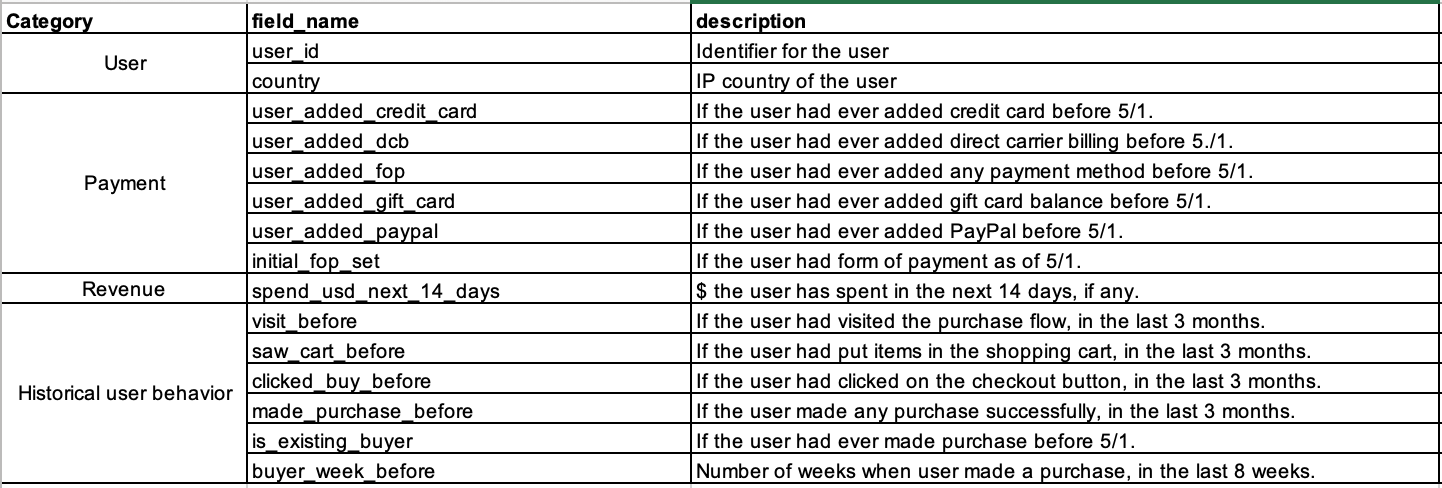

In [5]:
from IPython.display import Image
Image(filename='Data dictionary.png',width=1000)

A brief overview of the 

In [6]:
# shape of data
my_data.shape

(566699, 15)

Quick overview of the number of rows and columns. Number of samples: 566699. Number of columns: 15

## **Check Missing Value**

Keep in mind that the first thing is always to remove duplicates which helps you reduce the workload for dealing with missing values.

In [7]:
# Remove Duplicates
my_data = my_data.drop_duplicates()

In [8]:
# Check missing value
my_data.shape[0] - my_data.count()

buyer_week_before              0
clicked_buy_before         70803
country                    12480
existing_buyer                 0
initial_fop_set                0
made_purchase_before       70803
saw_cart_before            70803
spend_usd_next_14_days    470959
user_added_credit_card    389434
user_added_dcb            389434
user_added_fop                 0
user_added_gift_card      389434
user_added_paypal         389434
user_id                        0
visit_before                   0
dtype: int64

There is a variety of ways to handle missing values.  For instance, build models (clustering) to predict the missing value which is a good idea though, but the complicated building processes come with high cost; Using the mean and meadian to replace missing values is limited to numerical categories. Someone may also say fill the missing values with max(), min() which will lead to bias and noise. Deleting the missing valus will cause data incomplete. Therefore, the way to take actions on missing values depend on the context of the problem. 

We have nearly 83%(470959/566699) of missing values for spend_usd_next_14_days column. It doesn't make senses if we directly remove it, because we are trying to keep and use the data as much as we can. Once we delete the missing records, the data entry will be eliminated accordingly. But some other features in those entries are very important and may have a big impact on further analysis.Thus, we don't want to delete the missing records. <br>
 

#### Delete data entry with NA in the following columns:  clicked_buy_before, country,made_purchase_before,saw_cart_before

For missing values in clicked_buy_before, You cannot fill the values with mean or median using clustering method becasue there is no explicit way to judge whether one purchase or not ever before. On the other hand, the proportion of missing value is small. 
<br><br>For missing values in country, first, it has a small number of missing values. On top of that, we don't have sufficient information to generate the mean, or use any other methods to obtain a value that can be used to replace the N/A values. 
<br><br> For missing values in made_purchase_before, this is pretty similar to clicked_buy_before.First, We don't know whether users make purchases or not based on the information provided. Second, the N/A records is relatively small. 
<br><br>For missing values in saw_cart_before, it's awefully hard to imagine if the user has ever seen the product and put it in the cart. We cannot infer or speculate the resonable values to fill up the N/A. 

#### Fill the N/A with 0 for Columns: spend_usd_next_14_days, user_added_credit_card(dcb, gift_card, paypal)


Spend_usd: <br>Consider the purchase funnel: visit the website->put into cart-> click purchase button->successfully made purchases. Only the last action 'made purchase successfully' is closely related to the spend_usd. Any other actions have nothing relationship with money. Therefore, replacing N/A with zero makes sense. <br><br>
User_added_credit_card, dcb,gift_card,paypal: 
<br><font color=blue> Q: Why are there same number of missing values for form of payments?</font>
<br>They have exactly the same number of missing values. Why this happened? Probably because the online e-commerce platform added a new feature after a particular date. Those missing values are generated before the new feature of form of payments are created. If we think of this way, it explains that those missing data don't exist before the new feature added. Go back to see these four columns which show either 0 or 1. It's reasonable to replace N/A with 0. 
<br>
<br> ***For example***, the dataset is collected from 01.01.2019 to 2020.12.31. Fops features is added on 01.01.2020. There are no data related to this feature between 01.01.2019 and 01.01.2020.Begin from 01.01.2020, you started collecting inforamtion about Fops.Before the form of payments added, there are missing values regarding Fops.

In [9]:
# remove NA in payment methods
df = my_data.dropna(subset = ['made_purchase_before', 'clicked_buy_before', 'country', 'saw_cart_before'])

# fill na with 0
df = df.fillna(0)

In [10]:
df.shape[0] - df.count()

buyer_week_before         0
clicked_buy_before        0
country                   0
existing_buyer            0
initial_fop_set           0
made_purchase_before      0
saw_cart_before           0
spend_usd_next_14_days    0
user_added_credit_card    0
user_added_dcb            0
user_added_fop            0
user_added_gift_card      0
user_added_paypal         0
user_id                   0
visit_before              0
dtype: int64

<font color=red>Note: double check the number of missing values. </font> In real-world projects, we are likely to encounter hundreds of columns/features. Many methods to deal with missing values are involved. It's better and be safe to check if you've done with all the missing values for all columns. 

In [11]:
# The length of the data now
len(df)

477946

Now, we have 477946 data entries left for ongoing analysis. 566699-477946 = 88753. We got rid of 88753 records.

## **How to Find Top Countries** (based on population)

In [12]:
df.head()

,buyer_week_before,clicked_buy_before,country,existing_buyer,initial_fop_set,made_purchase_before,saw_cart_before,spend_usd_next_14_days,user_added_credit_card,user_added_dcb,user_added_fop,user_added_gift_card,user_added_paypal,user_id,visit_before
0,0,0.0,IN,0,False,0.0,1.0,0.000000,0.0,0.0,0,0.0,0.0,1.832130e+19,1
1,0,0.0,IN,0,False,0.0,1.0,0.000000,0.0,0.0,0,0.0,0.0,1.370540e+19,1
3,0,1.0,CA,1,True,1.0,1.0,7.398815,1.0,0.0,1,0.0,0.0,2.340070e+18,1
4,7,1.0,PL,1,True,1.0,1.0,0.000000,0.0,1.0,1,0.0,0.0,1.189100e+19,1
5,0,0.0,ID,0,False,0.0,1.0,0.000000,0.0,0.0,0,0.0,0.0,1.696040e+19,1


In [13]:
df.groupby(['country']).size()

country
AE     1819
AF       12
AG       16
AI        1
AL      310
AM      325
AO       59
AR     9037
AS        5
AT     1206
AU     3098
AW       19
AX        1
AZ      913
BA      443
BB        3
BD     3650
BE      894
BF       27
BG      949
BH      410
BJ       29
BN       20
BO     1135
BQ        7
BR    30309
BS       66
BT        2
BW       15
BY     1348
      ...  
SO        2
SR        1
SV      772
SY      563
TG       21
TH     9531
TJ      170
TL        3
TM      132
TN     1311
TR    15218
TT      158
TW     4926
TZ      208
UA     4661
UG       46
US    58989
UY      673
UZ      353
VE     1042
VG        1
VI        6
VN    11872
VU        1
WS        1
XK       74
YE      294
ZA     1750
ZM       39
ZW       34
Length: 191, dtype: int64

In [14]:
country_rank = df.groupby(['country']).size().reset_index(name='counts')

In [15]:
country_rank

,country,counts
0,AE,1819
1,AF,12
2,AG,16
3,AI,1
4,AL,310
5,AM,325
6,AO,59
7,AR,9037
8,AS,5
9,AT,1206


In [16]:
country_rank = country_rank.sort_values('counts', ascending = False)[:10]
country_rank

,country,counts
177,US,58989
80,IN,58113
76,ID,33536
25,BR,30309
151,RU,20339
88,JP,17569
171,TR,15218
124,MX,12930
93,KR,12608
183,VN,11872


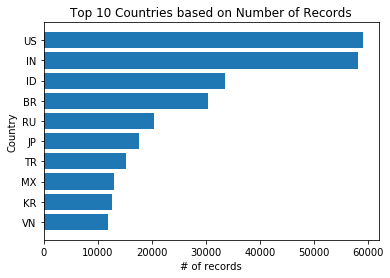

In [17]:
 # Create horizontal bars
plt.barh(country_rank['country'], country_rank['counts'])

# Create names on the y-axis
y_pos = np.arange(len(country_rank['country']))
plt.yticks(y_pos, country_rank['country'])
plt.title('Top 10 Countries based on Number of Records')
plt.xlabel('# of records') 
plt.ylabel('Country')
plt.gca().invert_yaxis()
plt.show()

US and IN are our online store's top two main customers. Thus,we need to focus on these two countires while making business plans and decisions. Top four countries are United States, India, Indonesia and Brazil. 

## ** How to Find Top Countries** (based on spend_usd)

In [18]:
df.groupby(['country'])['spend_usd_next_14_days'].sum().round()

country
AE      20062.0
AF         87.0
AG          0.0
AI          0.0
AL        172.0
AM        692.0
AO          0.0
AR      15735.0
AS        200.0
AT      26818.0
AU     121366.0
AW         45.0
AX          0.0
AZ        166.0
BA        179.0
BB          0.0
BD        135.0
BE      13360.0
BF          6.0
BG       2196.0
BH       2029.0
BJ         10.0
BN        213.0
BO        418.0
BQ          0.0
BR      36273.0
BS        420.0
BT          0.0
BW         23.0
BY       1148.0
        ...    
SO          0.0
SR          0.0
SV        591.0
SY        124.0
TG          0.0
TH      40134.0
TJ         56.0
TL          1.0
TM          0.0
TN        250.0
TR      35822.0
TT        705.0
TW     240808.0
TZ        252.0
UA       4396.0
UG        165.0
US    1504959.0
UY        981.0
UZ         29.0
VE         61.0
VG          1.0
VI        164.0
VN       9481.0
VU         10.0
WS          0.0
XK          0.0
YE        300.0
ZA      15872.0
ZM         42.0
ZW          0.0
Name: spend_usd_

In [19]:
country_rank1 = df.groupby(['country'])['spend_usd_next_14_days'].sum().reset_index(name='total_spend_usd').round()
country_rank1

,country,total_spend_usd
0,AE,20062.0
1,AF,87.0
2,AG,0.0
3,AI,0.0
4,AL,172.0
5,AM,692.0
6,AO,0.0
7,AR,15735.0
8,AS,200.0
9,AT,26818.0


In [20]:
country_rank1 = country_rank1.sort_values('total_spend_usd', ascending = False)[:10]
country_rank1

,country,total_spend_usd
88,JP,1807815.0
177,US,1504959.0
93,KR,626838.0
173,TW,240808.0
44,DE,190202.0
59,GB,145311.0
57,FR,122109.0
10,AU,121366.0
31,CA,85326.0
71,HK,84370.0


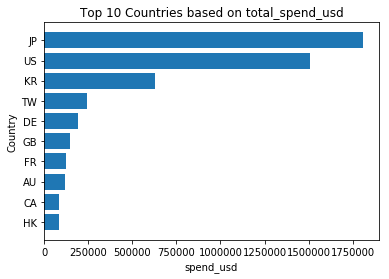

In [21]:
# Create horizontal bars
plt.barh(country_rank1['country'], country_rank1['total_spend_usd'])

# Create names on the y-axis
y_pos = np.arange(len(country_rank1['country']))
plt.yticks(y_pos, country_rank1['country'])
plt.title('Top 10 Countries based on total_spend_usd')
plt.xlabel('spend_usd') 
plt.ylabel('Country')
plt.gca().invert_yaxis()
plt.show()

#### Now, we can see top four countries that account for the most part of revenue are Japan, United States, South Korea, China,Taiwan. 

## **Exploration - Spend USD in next 14 Days**

In [22]:
spend_usd_next_14_days = df.spend_usd_next_14_days

In [23]:
spend_usd_next_14_days.describe()

count    477946.000000
mean         12.228711
std          94.953851
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max       22519.570000
Name: spend_usd_next_14_days, dtype: float64

Insights:
<br>At the first glance of the distribution of spend_usd, we find the range of data is huge with high standard deviation. There are many records with 0. Over 75% of the data is 0.Lots of users don't spend money at all. Those zero records drag the overall mean low. <br> The median is also 0 which corresponds to 50%. 

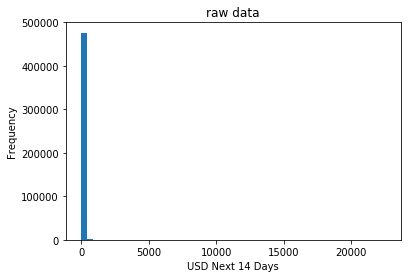

In [24]:
plt.hist(spend_usd_next_14_days, bins = 50)
plt.xlabel("USD Next 14 Days")
plt.ylabel("Frequency")
plt.title("raw data")
plt.show()

Unfortunately, We cannot get and grab useful information from the chart above. <br> - People tend to think to make changes on the bins, but the chart will be very long and will see an incomplete chart in one interface. <br>- How about we use log? The answer is no. Since we have 477946 records after dealign with missing values.470959 missing values are replaced with zero. Even if we use log, it still won't give us a clear distribution.<br> -
<font color=blue> Remove the zero values or outliers make more sense.</font> 

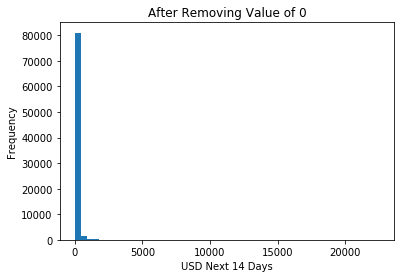

In [25]:
# Remove value of 0
plt.hist(spend_usd_next_14_days[spend_usd_next_14_days != 0], bins = 50)
plt.xlabel("USD Next 14 Days")
plt.ylabel("Frequency")
plt.title("After Removing Value of 0")
plt.show()

Although we can see smal histograms next to the first bar, this distribution still looks bad. From the descriptive analysis, we've seen the maximum value is 22519.57 which can be considered as outliers making this chart looks nonsense. This is a highly skewed distribution. <br><br> It's necessary to find cutoff values that make our distribution look good by removing small groups of users with extremely large expenses.

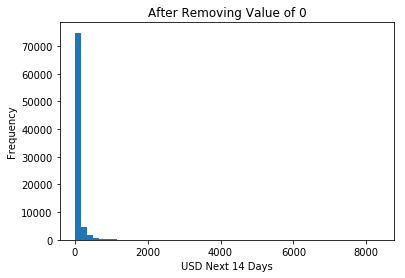

In [26]:
# Remove value of 0
plt.hist(spend_usd_next_14_days[(0 < spend_usd_next_14_days) & (spend_usd_next_14_days < 10000)], bins = 50)
plt.xlabel("USD Next 14 Days")
plt.ylabel("Frequency")
plt.title("After Removing Value of 0")
plt.show()

Speaking of the histogram above, we observe that the amount of money most customers spent is close to zero. Most customers made purchases on cheap product and goods. We can't even spot data points with money spent larger than $1000. So we can speculate that data points outside 1000 are outliers.  <br><br>
I choose two cutoff values and want to know what percentage of data are included inside the range of cutoff values.

In [27]:
n = len(spend_usd_next_14_days) + 0.0
print('# users who spend larger than 100 USD', len(spend_usd_next_14_days[spend_usd_next_14_days >= 100]) / n)
print('# users who spend larger than 500 USD', len(spend_usd_next_14_days[spend_usd_next_14_days >= 500]) / n)

# users who spend larger than 100 USD 0.027942487226590453
# users who spend larger than 500 USD 0.003799592422574935


If we pick 100 USD as the cutoff value, we have approximately 97.21% of data included. 
<br>If we pick 500 USD as the cutoff value, we have approximately 99.62% of data included.

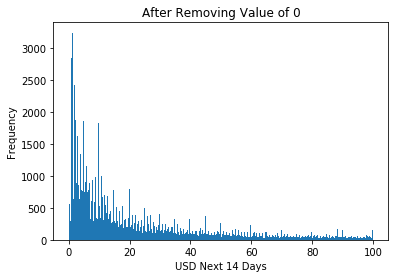

In [28]:
plt.hist(spend_usd_next_14_days[(spend_usd_next_14_days <= 100) & (spend_usd_next_14_days != 0)], bins = 300)
plt.xlabel("USD Next 14 Days")
plt.ylabel("Frequency")
plt.title("After Removing Value of 0")
plt.show()

Here, I chose 100 USD as cutoff value and drew the plot.It now looks better. The prices of products customers bought from online store are relatively low.We can see there are many peaks in the chart which can be spotted on,for example, 0.99 USD, 9.99 USD, 19.99 USD, 39.99 USD with high frequency. Seeing a price end in .99 is so common that shooppers hardly notice this selling tactic. On the other hand, we could say or make reference that most of products sold are priced ending with this number .99.  <br>
Most consumers purchased stuff with price range from 0-20 USD. There is a downward trend showing in the distribution. As the price goes up, less people made purchases.<br><br>
When I take a closer look at the chart, I come up some ideas or speculations: <br>- The overall prices of product in this online store is low.<br> - Conduct market campaign and promotion for prices of goods between 0 and 20 USD and do good for business and stimulate more selling. 

In [29]:
# If purchased before...
purchased = df[df['made_purchase_before'] == 1]
purchased_spend_rate = len(purchased[purchased['spend_usd_next_14_days'] != 0]) / (len(purchased) + 0.0)

# print reuslts
print('If purchased before, the spend rate is: ', purchased_spend_rate)

If purchased before, the spend rate is:  0.7310455143176777


<font color = Green> To explore the user engagement, I've done a probability calculation and got the results that For every 10 customers, there are seven returning customers who made purchases before and will make the second purchases. 
<br> we should improve the user engagement in order to increase the revenue. e.g. give regular customers additional discount,coupon or promotion.

### Should I analyze the forms of payments or the purchase flow next? 
<br> Since we have numerous information in the dataset about purchase flow , and the form of payments are associated with the last action in the flow. Thus, let's dive into the purchase funnel.

## **Purchase Funnel**

In [30]:
# for each stage
n_total = len(my_data)
n_visited = len(df)
n_saw = df['saw_cart_before'].sum()
n_clicked = df['clicked_buy_before'].sum()
n_purchased = df['made_purchase_before'].sum()

# create dataframe 
funnel_df = pd.DataFrame(columns=['action', 'num', 'cr_stage'])
funnel_df['action'] = ['visited', 'saw', 'clicked', 'purchased']
funnel_df['num'] = [n_visited, n_saw, n_clicked, n_purchased]
# cr_stage = each action # / total #
funnel_df['cr_stage'] = np.array([n_visited, n_saw, n_clicked, n_purchased]) / n_total

# print table
print('Number of users and conversion rate for each stage:')
print(funnel_df)

Number of users and conversion rate for each stage:
      action       num  cr_stage
0    visited  477946.0  0.853492
1        saw  445594.0  0.795719
2    clicked  124213.0  0.221813
3  purchased  101902.0  0.181971


<font color = blue>Conversion rate</font>: 
- saw: The percentage of users who visited the online store and decide to put things into their cart. <br><br>
- clicked: The percentage of users who clicked to "purchase button". <br><br>
- purchased: The percentage of users who added payment methods paid to but things successfully. (receiving the oder confirmation email and order ID number)

<font color=blue>You may wonder why there is a conversation rate for action "visited". How to define if a user visit our website and explain the missing values? </font>
<br><br> The missing values of visited illustrates that some user tried to enter into our website through hyperlink or web section, but failed. They were likely to encounter internet connection problems,  bugs existing in the website, error page, etc. For example, some websites are full of images and videos which will lead to high latency and stay buffering for a long time. People will give up loading the page and exit out of that websites.<br><br> <font color=blue>Insights</font>:<br>
By look at the visited conversation rate, we can make developers aware of this loading issue and get the issue fixed so that users are able to access website pages within a second or even faster. This will improve user base. <br>
<br> <font color = blue>It reminds me of representative A/B testing cases</font>.  <br> - Replace a video snippet in Home page with a static picture to reduce loading time. <br> - Replace a high resolution image with low resolution but clear enought image to reduce loading time.

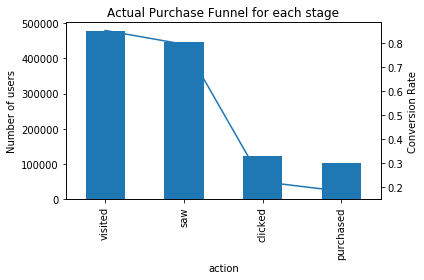

In [31]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
funnel_df.plot.bar('action','num', ax = ax1, legend=False)
funnel_df.plot('action','cr_stage', ax = ax2, legend=False)
plt.xlim([-0.5,3.5])
ax1.set_ylabel('Number of users')
ax2.set_ylabel('Conversion Rate')
ax1.set_title('Actual Purchase Funnel for each stage')
fig.subplots_adjust(right = 0.8)
plt.tight_layout()
plt.show()


The purchase funnel shows an inverted triangle pattern. The total number of user or large user base is on top layer and the small number of users who made purchases located in the lowest layer. <br>
<br> There is a drop in conversion rate between the saw and clicked stages. Add a reminder function to send emails or notifications which will be more likely to increase the conversion rate. However, you cannot control the behavior of customers. Even if you send reminders, users won't use the benefits to make purchases. For example, Sephora sends customers coupon and discount information every year, but still does bad results. For expensive products, customers refuse to buy the goods with discounted price because it's still above their budget. Besides, a customer put five kinds of lipstick into cart for easy comparison. She only needs to purchase one. The other lipsticks left in the cart are not useful until the purchased one is used up. Moreover, a student put a HP computer in the cart and was hesitant over buying it. It's hard to quantify the customer behavior and no information provided about what makes users to check out stuff on cart. 

In [32]:
funnel_df['stage_stage'] = ['begin_visited', 'visited_saw', 'saw_clicked', 'clicked_purchase']
funnel_df['cr_from_to'] = [n_visited/(n_total + 0.0), n_saw/n_visited, n_clicked/n_saw, n_purchased/n_clicked]
print('converstion rate stage-to-stage')
print(funnel_df[['stage_stage', 'cr_from_to']])

converstion rate stage-to-stage
        stage_stage  cr_from_to
0     begin_visited    0.853492
1       visited_saw    0.932310
2       saw_clicked    0.278758
3  clicked_purchase    0.820381


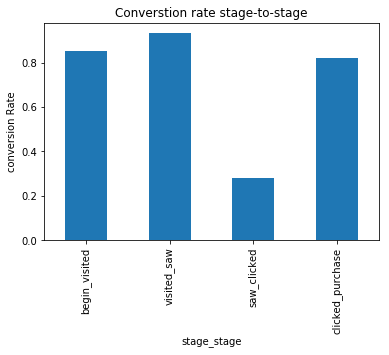

In [33]:
funnel_df.plot.bar('stage_stage', 'cr_from_to', legend = False)
plt.ylabel('conversion Rate')
plt.title('Converstion rate stage-to-stage')
plt.show()

<font color=blue> Q: 
We need to pay attention to the clicked_purchase step.Why?</font> <br> 
- Because begin_visited and visited_saw depends on user preference and can't generate a measurable conclusion.
- Clicked_purchase step is easy to control, including filling out personal information, billing address and card info, third party patment method. The problem is either solved or not being solved which can be figured out.
- clicked_purchase is associated with forms of payments. We can analyze which type of payment has higher conversion rate.
<br>
<br>
<font color=blue>Q: 
What can you make inference about from the bar chart?</font><br><br> The conversion rate of clicked_purchase is about 0.82 which means that users have trouble in making payments. There is potential improvement over the clicked_purchase. 

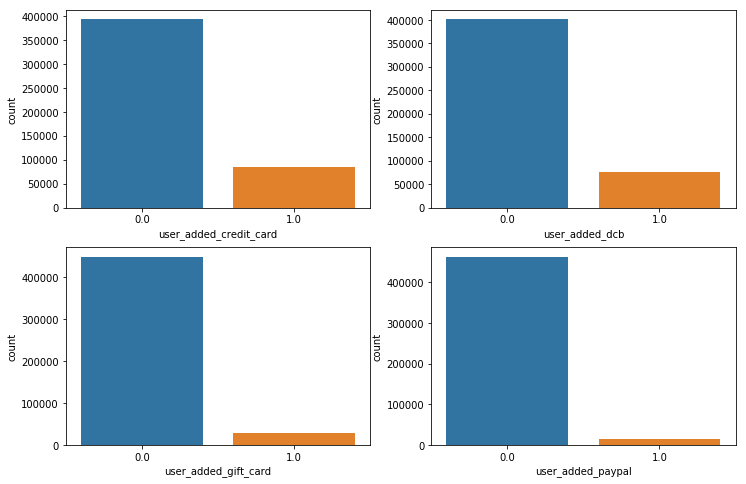

In [34]:
# find the distribution of payment method
target_features = ['user_added_credit_card', 'user_added_dcb', 'user_added_gift_card', 'user_added_paypal']

# categorical histograms
fig = plt.figure(figsize=(12, 8))
for i, column in enumerate(target_features):
  fig.add_subplot(2,2, i+1)
  sns.countplot(df[column]) # for discrete numbers
  # for continous number: sns.distplot(df[column])

<font color = blue>Q: Why there are so many 0 values?</font> <br>
Because while dealing with missing values, we replace over 390,000 records with 0. This chart above should be expected. 
<br><font color=blue> Insights</font>: <br>
The majority of users paid with credit card and dcb. The minority of users paid with gift card and paypal.

<font color = blue>But I wonder if the total amount of spend_USD for credit_card is the biggest among these four types of payments. What is the relationship between total sales and form of payments respectively? 

In [35]:
# frequency for each payment method
credit_card_count = df['user_added_credit_card'].sum()
dcb_count = df['user_added_dcb'].sum()
gift_card_count = df['user_added_gift_card'].sum()
paypal_count = df['user_added_paypal'].sum()

# Calculate total_spend_usd for each fop
total_spend_usd_credit_card = df.loc[df['user_added_credit_card']== 1,'spend_usd_next_14_days'].sum()
total_spend_usd_dcb = df.loc[df['user_added_dcb']==1 ,'spend_usd_next_14_days'].sum()
total_spend_usd_gift_card = df.loc[df['user_added_gift_card']==1 ,'spend_usd_next_14_days'].sum()
total_spend_usd_paypal = df.loc[df['user_added_paypal']==1 ,'spend_usd_next_14_days'].sum()

# create dataframe
spend_usd_fops_df = pd.DataFrame(columns=['fops','frequency','total_spend_usd','avg_spend_usd'])
spend_usd_fops_df['fops'] = ['credit_card','dcb','gift_card','paypal']
spend_usd_fops_df['frequency'] = [credit_card_count,dcb_count,gift_card_count,paypal_count]
spend_usd_fops_df['total_spend_usd'] = [total_spend_usd_credit_card,total_spend_usd_dcb,total_spend_usd_gift_card,total_spend_usd_paypal]

#Calculate avg_spend_usd
spend_usd_fops_df['avg_spend_usd'] = spend_usd_fops_df['total_spend_usd']/spend_usd_fops_df['frequency']

#print table
print(spend_usd_fops_df.round())

          fops  frequency  total_spend_usd  avg_spend_usd
0  credit_card    85053.0        4026331.0           47.0
1          dcb    77057.0        3329058.0           43.0
2    gift_card    29504.0        2046772.0           69.0
3       paypal    15061.0         647604.0           43.0


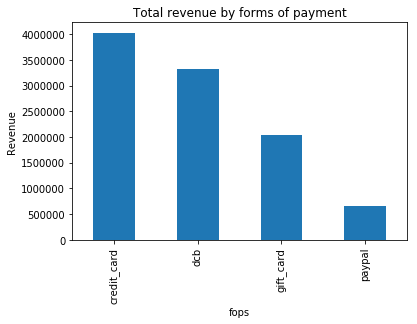

In [36]:
spend_usd_fops_df.plot.bar('fops', 'total_spend_usd', legend = False)
plt.ylabel('Revenue')
plt.title('Total revenue by forms of payment')
plt.show()

#### Findings <br>
-From the previous payment method distribution, we know that most people made purchases with credit_card and dcb.Now we find out customers paying with credit_card contributed the greatest total revenue over 4 million USD. 

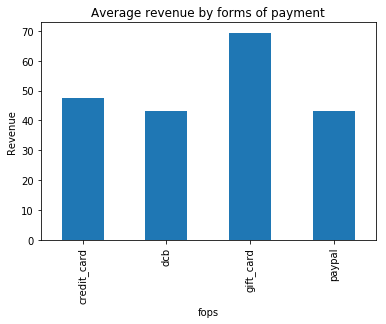

In [37]:
spend_usd_fops_df.plot.bar('fops', 'avg_spend_usd', legend = False)
plt.ylabel('Revenue')
plt.title('Average revenue by forms of payment')
plt.show()

-The average spend for users paying with gift_card is 69 USD which ranks No.1 among fops. 

##  **Popularity of fops in Top four countries based on population**

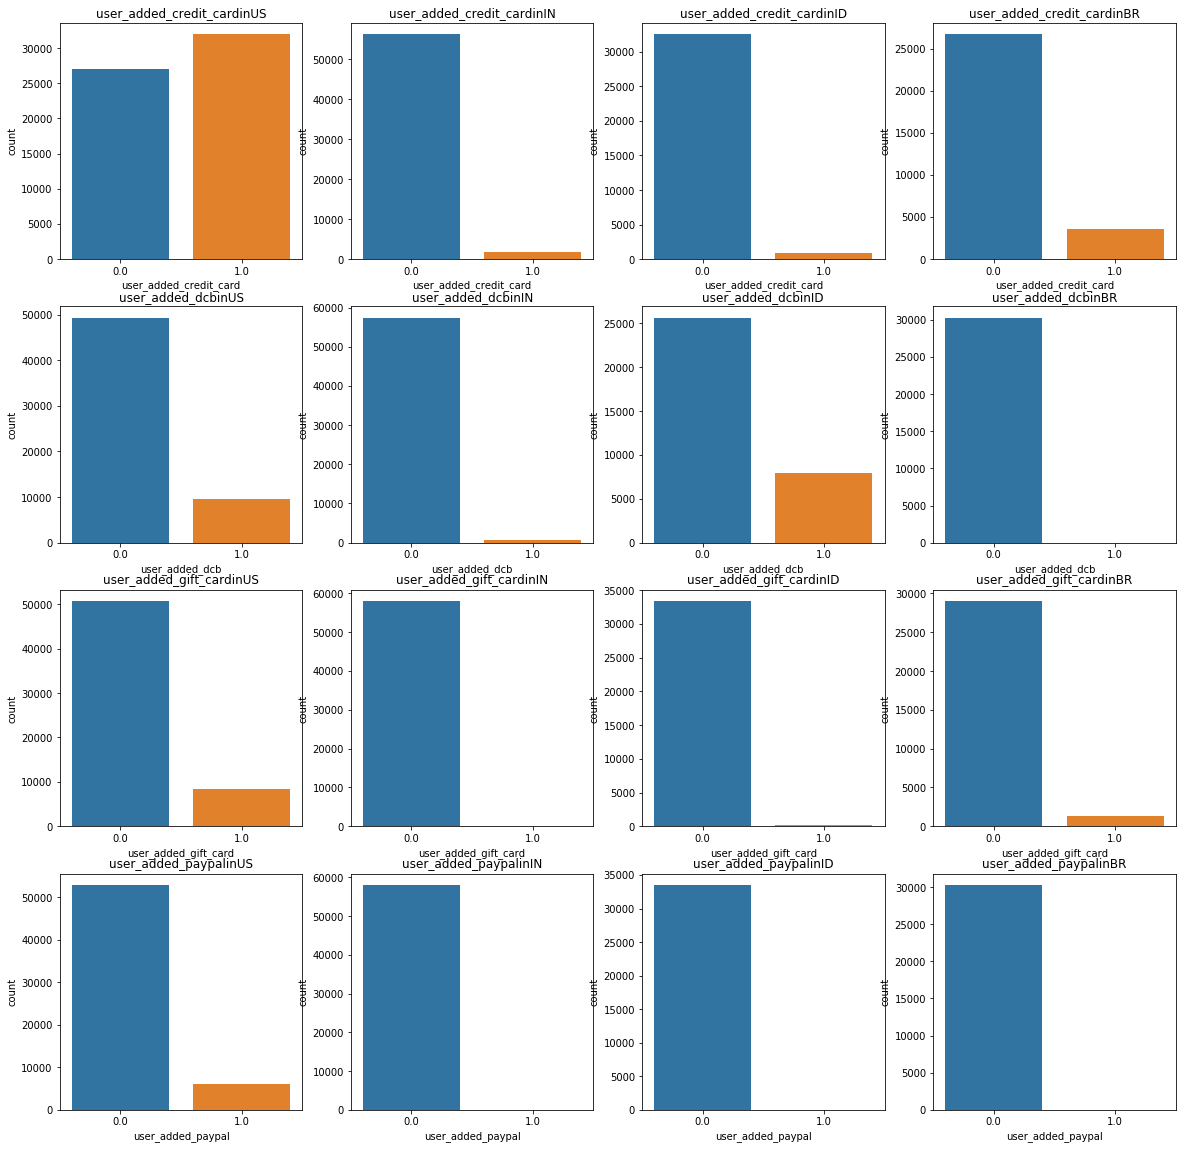

In [38]:
# Analysis through different countries. Top four countries we selected from previous analysis based on population/ number of users geographically.
country = ['US', 'IN', 'ID', 'BR']
count = 1
fig = plt.figure(figsize = (20, 20))
for i, fop in enumerate(target_features):
  for j, c in enumerate(country):
    fig.add_subplot(4,4, count)
    sns.countplot(df[df['country'] == c][fop])
    plt.title(fop + 'in' + c)
    count += 1

Insight:
<br> There are 58113 users who come from India tried to access or accessed our online store. 943(spend_usd_next_14_days) users made purchases. Out of 58113, 1845 individuals added credit card, 699 added dcb, 171 added gift card and no one added paypal. 

### <font color = Green> Astonishing findings</font> <br> 
I found an intersting fact that there are 17569 users coming from Japan, 15218 users made purchases. Even though the number of users in India visiting online store website is way bigger than number of users in Japan, Japan's users are more likely to spend money buying products with huge buying power. As a decision maker, we should take this factor into consideration and should pick countries with the biggest number of spend_usd (people made purchases).  

##  **Popularity of fops in Top four countries based on total_spend_usd**

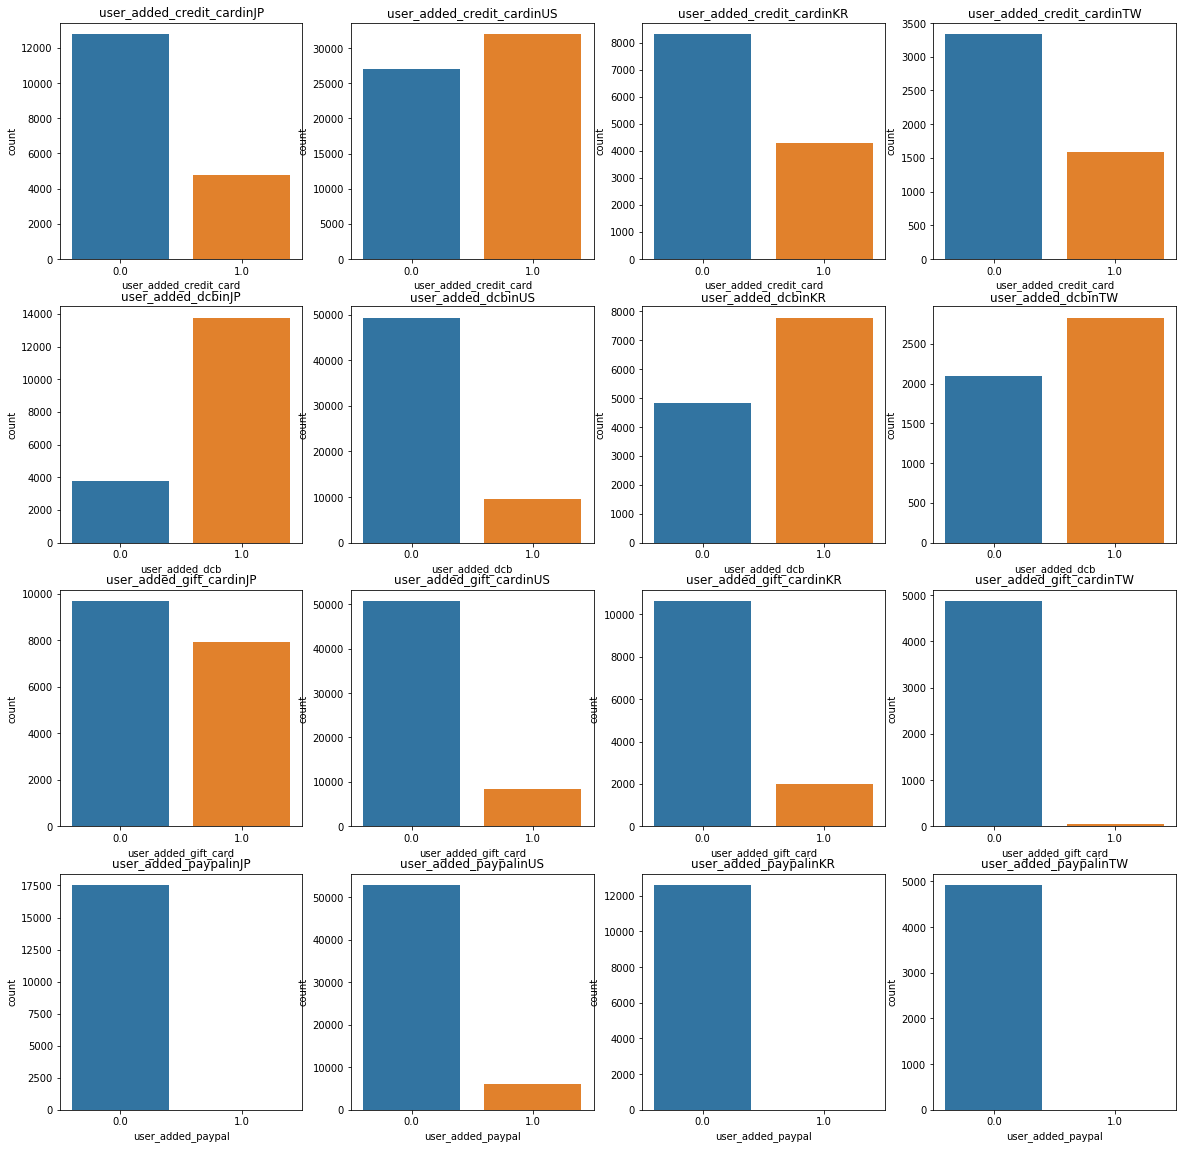

In [39]:
# Analysis through different countries. Top four countries we selected from previous analysis based on total_spend_usd.
country = ['JP', 'US', 'KR', 'TW']
count = 1
fig = plt.figure(figsize = (20, 20))
for i, fop in enumerate(target_features):
  for j, c in enumerate(country):
    fig.add_subplot(4,4, count)
    sns.countplot(df[df['country'] == c][fop])
    plt.title(fop + 'in' + c)
    count += 1

### <font color = Green> Interesting findings</font> <br> 
- In Japan, most users use dcb to pay. I don't even know what is dcb before doing this project and even more surprisingly realized that it's a popular paying method in Japan and South Korea. Credit card are not the dominant online payment method in Japan compared to America. 
<br><br> 
- Moreover, people in these countries seldom pay with paypal.

**If you want to know more about why Japan & South Korea are DCB market leaders, please read this article.**
<br> https://www.docomopayments.com/resource/blog/why-japan-south-korea-are-dcb-market-leaders/

## Figure out the precise number of records for each payment method of four countries.

### Method 1:

In [40]:
df[df['country']== 'JP']['user_added_credit_card'].sum().round()

4775.0

### Method 2:

In [41]:
df.groupby(['country'])['user_added_credit_card'].sum().round()

country
AE      209.0
AF        5.0
AG        1.0
AI        0.0
AL       12.0
AM       15.0
AO        0.0
AR      748.0
AS        2.0
AT      159.0
AU     1737.0
AW        3.0
AX        1.0
AZ       35.0
BA       19.0
BB        0.0
BD       25.0
BE      154.0
BF        3.0
BG      144.0
BH       19.0
BJ        3.0
BN       11.0
BO       42.0
BQ        1.0
BR     3562.0
BS       16.0
BT        0.0
BW        3.0
BY      165.0
       ...   
SO        1.0
SR        0.0
SV       64.0
SY        2.0
TG        1.0
TH     1305.0
TJ        6.0
TL        1.0
TM        1.0
TN       14.0
TR     1635.0
TT       30.0
TW     1588.0
TZ        5.0
UA      549.0
UG        3.0
US    32019.0
UY       59.0
UZ        7.0
VE       28.0
VG        1.0
VI        2.0
VN      175.0
VU        1.0
WS        1.0
XK        2.0
YE        4.0
ZA      414.0
ZM        2.0
ZW        1.0
Name: user_added_credit_card, Length: 191, dtype: float64

In [42]:
Japan_rank = df.groupby(['country'])['user_added_credit_card'].sum().reset_index(name='counts').round()
Japan_rank

,country,counts
0,AE,209.0
1,AF,5.0
2,AG,1.0
3,AI,0.0
4,AL,12.0
5,AM,15.0
6,AO,0.0
7,AR,748.0
8,AS,2.0
9,AT,159.0


In [43]:
Japan_rank = Japan_rank.sort_values('counts', ascending = False)[:10]
Japan_rank

,country,counts
177,US,32019.0
88,JP,4775.0
93,KR,4287.0
151,RU,3655.0
59,GB,3642.0
25,BR,3562.0
57,FR,2322.0
84,IT,2047.0
31,CA,1745.0
10,AU,1737.0


You can use both methods to figure out the number of Japanese users adding credit card as a payment method.

In [44]:
# Japan fops
Japan_credit = df[df['country']== 'JP']['user_added_credit_card'].sum().round()
Japan_dcb = df[df['country']== 'JP']['user_added_dcb'].sum().round()
Japan_gift = df[df['country']== 'JP']['user_added_gift_card'].sum().round()
Japan_paypal = df[df['country']== 'JP']['user_added_paypal'].sum().round()

# US fops
US_credit = df[df['country']== 'US']['user_added_credit_card'].sum().round()
US_dcb = df[df['country']== 'US']['user_added_dcb'].sum().round()
US_gift = df[df['country']== 'US']['user_added_gift_card'].sum().round()
US_paypal = df[df['country']== 'US']['user_added_paypal'].sum().round()

# KR fops
KR_credit = df[df['country']== 'KR']['user_added_credit_card'].sum().round()
KR_dcb = df[df['country']== 'KR']['user_added_dcb'].sum().round()
KR_gift = df[df['country']== 'KR']['user_added_gift_card'].sum().round()
KR_paypal = df[df['country']== 'KR']['user_added_paypal'].sum().round()

# CHINA(TW)
CNTW_credit = df[df['country']== 'TW']['user_added_credit_card'].sum().round()
CNTW_dcb = df[df['country']== 'TW']['user_added_dcb'].sum().round()
CNTW_gift = df[df['country']== 'TW']['user_added_gift_card'].sum().round()
CNTW_paypal = df[df['country']== 'TW']['user_added_paypal'].sum().round()

# Create dataframe
top_four_df = pd.DataFrame(columns=['country','credit_card','dcb','gift_card','paypal'])
top_four_df['country'] = ['JP','US','KR','CNTW']
top_four_df['credit_card'] = [Japan_credit,US_credit,KR_credit,CNTW_credit]
top_four_df['dcb'] = [Japan_dcb, US_dcb, KR_dcb, CNTW_dcb]
top_four_df['gift_card'] = [Japan_gift, US_gift, KR_gift, CNTW_gift]
top_four_df['paypal'] = [Japan_paypal, US_paypal, KR_paypal, CNTW_paypal]

print(top_four_df)

  country  credit_card      dcb  gift_card  paypal
0      JP       4775.0  13773.0     7897.0    19.0
1      US      32019.0   9622.0     8296.0  6105.0
2      KR       4287.0   7789.0     1982.0     5.0
3    CNTW       1588.0   2830.0       58.0     2.0


<font color= blue>Q: Should I continue to do analysis by country segment?</font> 
<br> The answer is no. Our goal is to increase the entire online store revenue by 5%. Instead of improving specific geographical areas, we aim to increase overall revenue. On the other hand, It's not possible to proceed A/B testing with multiple variables.

In [45]:
# Add multiple payment method vs. Add single payment method
def cr_fop(stage_interval, obj, df):
    tmp = df[df[obj] == 1][stage_interval].sum()
    return tmp[1] / tmp[0]

stage_interval = ['clicked_buy_before', 'made_purchase_before']

# Calculate multiple fop conversion rate
multiple_fop = []
for obj in target_features:
  cr = cr_fop(stage_interval, obj, df)
  multiple_fop.append(cr)

# Calculate single fop conversion rate
df['user_added_sum'] = df['user_added_credit_card'] + df['user_added_dcb'] + df['user_added_gift_card'] + df['user_added_paypal']
single_fop_df = df[df['user_added_sum'] == 1]
single_fop = []
for obj in target_features:
  cr = cr_fop(stage_interval, obj, single_fop_df)
  single_fop.append(cr)

FOP conversion rate:
                      fop  multiple_fop  single_fop
0  user_added_credit_card      0.863659    0.809614
1          user_added_dcb      0.814669    0.711622
2    user_added_gift_card      0.960136    0.953946
3       user_added_paypal      0.883465    0.784256


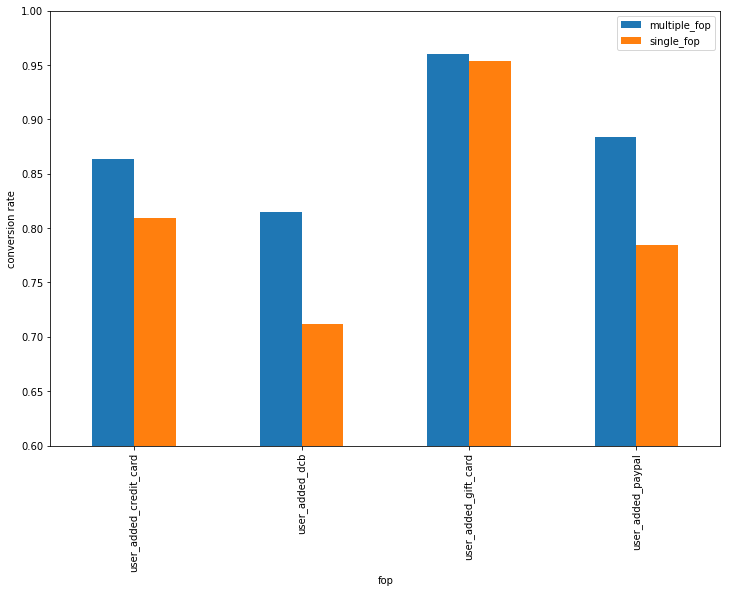

In [46]:
# draw bar plot
res_fop_df = pd.DataFrame(columns=['fop', 'multiple_fop', 'single_fop'])
res_fop_df['fop'] = target_features
res_fop_df['multiple_fop'] = multiple_fop
res_fop_df['single_fop'] = single_fop
print ('FOP conversion rate:')
print (res_fop_df)

res_fop_df.plot.bar(x = 'fop', y = ['multiple_fop', 'single_fop'], figsize = (12, 8))
plt.ylim(0.6, 1.0)
plt.ylabel('conversion rate')
plt.show()

<font color=blue>Insights:</font>
<br>
- The conversion rate of multiple_fop is higher than conversion rate of single_fop for all forms of payment. In other words, a user who add more than one fop has relatively higher conversion rate. <br>
- Ruling out the gift_card option, the conversion rate of credit_card is the second highest. <br>
<font color=red>Recommendation:</font>
<br>Therefore, we encourage users to add credit card as a payment method. I expect the conversion rate will go up. <br><br>
<font color = blue>Question: <br>
Suppose a customer has already added credit card, will push notification of using credit card help this person increase conversion rate?Should we deliver the promotion to all the users</font><br><br>
- The blue bar is the higher one for each fop. If we launch the benefits of adding multiple notification to all users, the conversion rate is more likely to jump up from orange bar to blue bar, resulting in higher conversion rate. 
- Even for users with credit card added, they are more likely to add other payment methods and slightly increase the conversion rate.
    
<font color = blue>Question: <br>
-Gift_card has the highest conversion rate by itself, but we won't recommend people to but things with gift_card. Why? </font><br><br>

1. Customers won't go to buy gift_card because online store requests to pay with gift_card. <br>
2. The way we get gift_card usually comes from friends, colleagues, family in festivals, or holidays. Once having gift_card, we urge to consume it as soon as possible. Somehow possessing a gift_card,especially with an expiration date, pushes customers to make purchases, leading to high conversion rate.  

## **Hypothesis** <br>
### - ***Encourage users to add credit card as one of their payment methods***. 

## **Run the Experiment** <br>
### - ***In work environment, you've done you work so far and just need to deliver your design to developers who will help you launch the experiment and get the results back to you***.  In this case scenario,  developers will follow your instructions. For example, send over emails with promotion or coupon to stimulate sample users to add credit card as one of their payment methods. <br>
Exeperiment design covers: <br>
- define success metric
- How to choose sample group( divided by what?)
- How to choose appropriate participants? 
- Make sure it won't cause any negative effect on current product
- Avoid participant bias( your tested group are not aware of being tested) 
- How long does the test need to run? 
- compe up ideas about improvement on how to initiate the action in order to attrack them to follow your expected path . ( 5$ off, offer coupons, etc.)

## A/B Test

In [47]:
my_data = pd.read_csv('Python_project_experiment.csv')

In [48]:
experiment = my_data
experiment.head(20)

,country,date,experiment_id,order_id,spend_usd,user_bucket,user_id,vertical
0,NaN,NaN,12624549,NaN,0.000000,3,1.660000e+19,NaN
1,NaN,NaN,12624548,NaN,0.000000,14,1.440000e+19,NaN
2,NaN,NaN,12624549,NaN,0.000000,20,8.430000e+18,NaN
3,NaN,NaN,12624549,NaN,0.000000,16,1.130000e+19,NaN
4,NaN,NaN,12624549,NaN,0.000000,14,1.400000e+18,NaN
5,NaN,NaN,12624549,NaN,0.000000,3,2.990000e+17,NaN
6,NaN,NaN,12624548,NaN,0.000000,6,7.170000e+18,NaN
7,NaN,NaN,12624549,NaN,0.000000,15,8.560000e+17,NaN
8,NaN,NaN,12624548,NaN,0.000000,4,7.070000e+18,NaN
9,NaN,NaN,12624549,NaN,0.000000,5,1.030000e+19,NaN


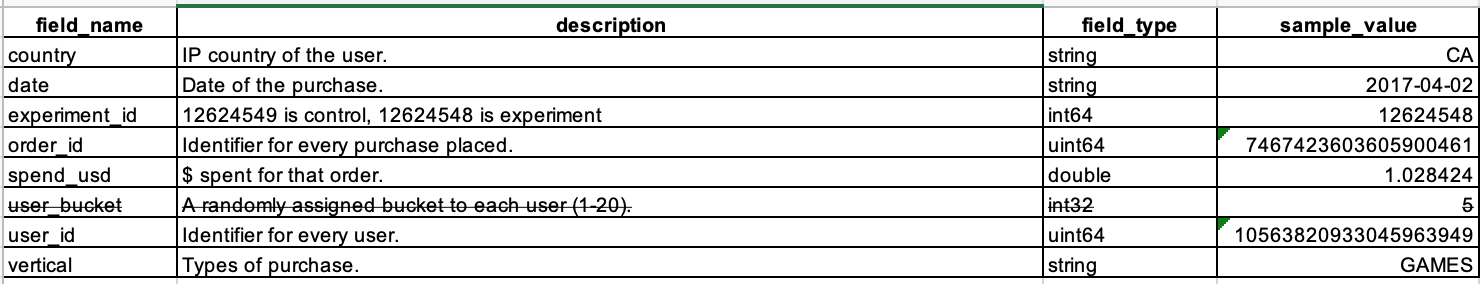

In [49]:
from IPython.display import Image
Image(filename='Experiment.png',width=1000)

<font color=blue>Vertical</font>: categories the sold products reside in. This column is not important for our analysis, because we only care about how much we sold and the corresponding spend_usd. <br><br>
<font color=blue>user_bucket</font>: the number of items users put into cart. It's not crucial either for analysis. The user_bucket could probably give us misleading information. For example, a user has 100 items in bucket. Each item worths 1 USD. Another user only has one item in bucket, but the item worth 10,000 USD. The only thing we need to focus on is the spend_usd which is associated with money earned. 

We can see there are two types of experiment_id which are 12624549 and 12624548.

In [50]:
control = experiment[experiment['experiment_id'] == 12624549]['spend_usd']
case = experiment[experiment['experiment_id'] == 12624548]['spend_usd']

print('Total number of experiment users is', len(experiment))
print('Number of users in case group', len(case))
print('Number of users in control group', len(control))

Total number of experiment users is 49166
Number of users in case group 24695
Number of users in control group 24471


#### The case/control ratio approaches 1 which is what we want to see. 

In [51]:
# control group
control_total = experiment[experiment['experiment_id'] == 12624549]['spend_usd'].sum()
print(control)

0         0.000000
2         0.000000
3         0.000000
4         0.000000
5         0.000000
7         0.000000
9         0.000000
10        0.000000
12        0.000000
13        2.164181
14        0.000000
15        0.000000
18        0.000000
23        0.000000
24        0.000000
25        0.000000
26       49.990000
27        9.990000
28        9.990000
29        9.990000
30        0.000000
32        0.000000
33        0.000000
35        0.000000
36        0.000000
38        0.000000
44        0.000000
45        5.590000
46        0.000000
50        0.000000
           ...    
49079     0.000000
49094     0.000000
49095     0.000000
49096     0.000000
49097     0.000000
49100     0.000000
49111     0.000000
49115     0.000000
49118     0.000000
49119     0.000000
49124     0.000000
49125     0.000000
49128     0.000000
49131     0.000000
49133     0.000000
49134     4.230000
49136     2.990000
49140     0.000000
49141     0.000000
49143     0.000000
49145     0.000000
49150     0.

In [52]:
# experiment group
case_total = experiment[experiment['experiment_id'] == 12624548]['spend_usd'].sum()
print(case)

1         0.000000
6         0.000000
8         0.000000
11        0.000000
16        0.975841
17        2.868148
19       26.174415
20        1.084750
21        0.000000
22        0.000000
31        0.000000
34        0.000000
37        0.000000
39        0.000000
40        0.000000
41        0.000000
42        0.000000
43        0.000000
47        0.000000
48        0.000000
49        0.000000
53        0.000000
54        0.000000
56        0.000000
57        0.000000
58        0.000000
60        0.000000
61        0.000000
63        0.000000
64        0.000000
           ...    
49113     0.000000
49114     5.440000
49116     0.000000
49117     0.000000
49120     0.000000
49121     0.000000
49122     0.000000
49123     0.000000
49126     4.121203
49127     0.000000
49129     0.000000
49130     0.000000
49132     0.000000
49135     0.000000
49137     5.379618
49138     5.379618
49139     0.000000
49142     0.000000
49144     0.000000
49146     0.000000
49147     0.000000
49148     0.

The total spend_usd of experiment group is higher than spend_usd of control group which means experiment group performs better.

In [53]:
24695*3.101232

76584.92424

In [54]:
print('Statistical summary for case group:')
print(case.describe())
print('Statistical summary for control group:')
print(control.describe())

Statistical summary for case group:
count    24695.000000
mean         3.101232
std         11.647487
min          0.000000
25%          0.000000
50%          0.000000
75%          0.975661
max        119.990000
Name: spend_usd, dtype: float64
Statistical summary for control group:
count    24471.000000
mean         2.807225
std         10.974284
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        199.990000
Name: spend_usd, dtype: float64


Insights: <br> 
- we find the distribution of experiment is pretty much similar to the distribution of historical data which means that the experiment data can reflect the real-world condition and close to reality.<br>
- mean is a key factor we need to consider, because it stands for spend_usd per user.

In [55]:
# Calculate potential increasing revenue
(3.1 - 2.8) / 2.8

0.10714285714285725

-The revenue increases up to 10.71% which is bigger than our target (5%). <br><br>
-we need to conduct a t-test to demonstrate if the result is statistically significant from a statistical perspective.

In [56]:
# perform two sample one side t-test on case/control group
from scipy import stats
stats.ttest_ind(case, control, equal_var=False)

Ttest_indResult(statistic=2.880888081055276, pvalue=0.0039672827581814325)

The t-statistics is 2.88 which is larger than 2.5(standard by default)<br>
The p-value 0.397% is smaller than 5% (by default) <br>

### **In conclusion, both t-statistics and p-value shows that our experiment group is statistically significant different from control group.**